In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv(r'C:\Users\isama\Desktop\dataset1\heart_cleveland_upload.csv')

# Ver las primeras filas
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [2]:
# Estadísticas descriptivas
print(df.describe())

# Información del DataFrame
print(df.info())

# Verificar valores faltantes
print(df.isnull().sum())


              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

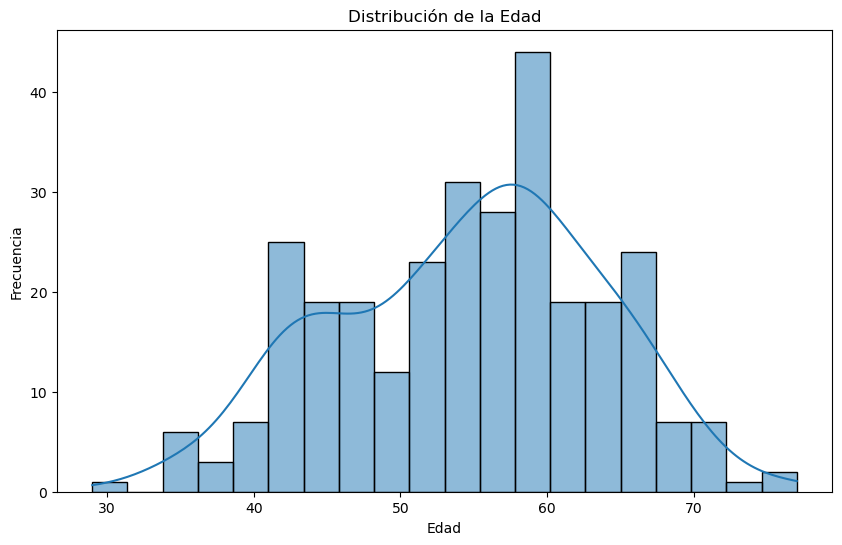

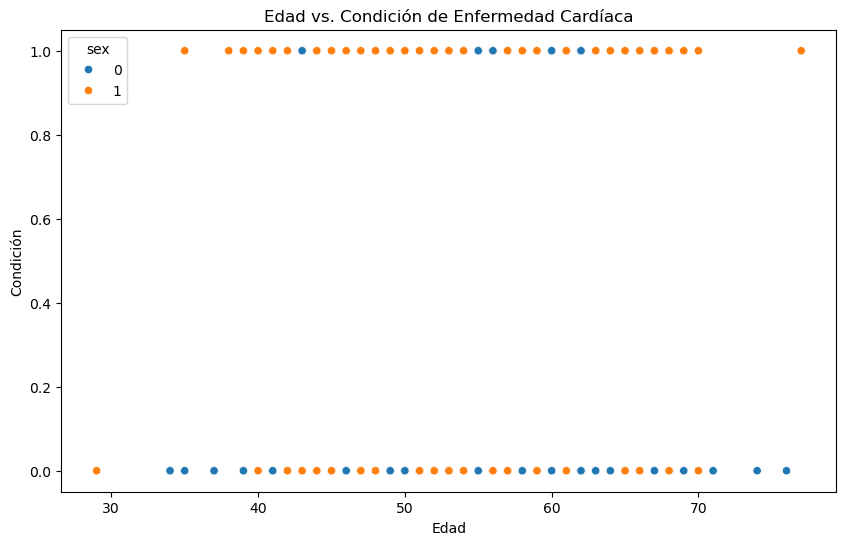

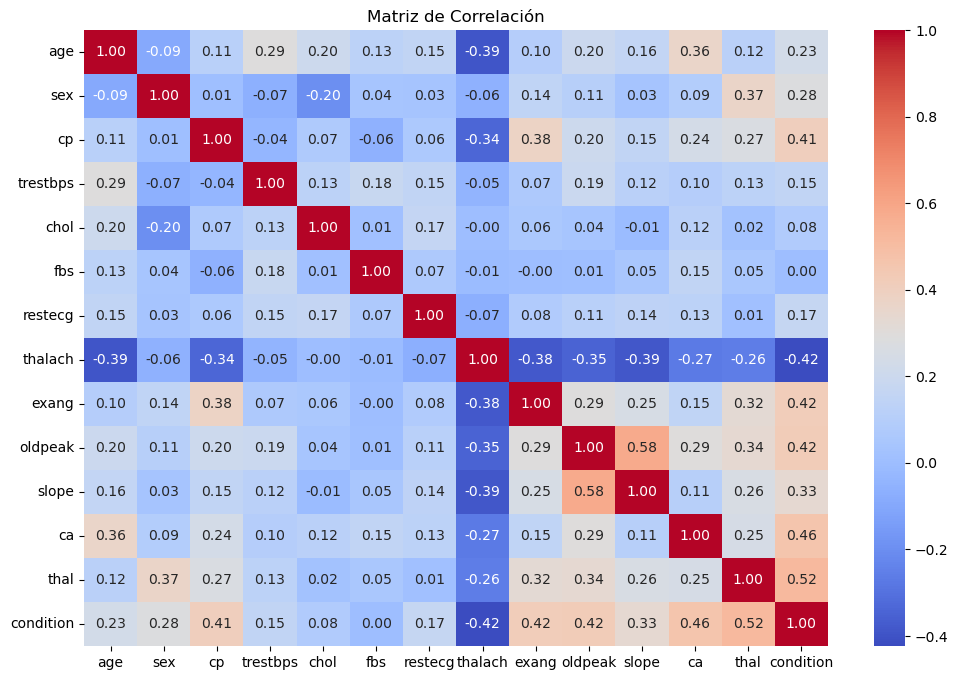

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de dispersión: Edad vs. Condición
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='condition', hue='sex')
plt.title('Edad vs. Condición de Enfermedad Cardíaca')
plt.xlabel('Edad')
plt.ylabel('Condición')
plt.show()

# Correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [4]:
missing_values = df.isnull().sum()
print(missing_values)


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [5]:
print(df.dtypes)


age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


In [6]:
# Verificar si hay registros duplicados
duplicates = df.duplicated().sum()
print(f'Duplicados: {duplicates}')


Duplicados: 0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])


In [8]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df.drop('condition', axis=1)  # Todas las columnas excepto 'condition'
y = df['condition']  # La columna 'condition'

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)



Train set: (237, 13) (237,)
Test set: (60, 13) (60,)


In [9]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LogisticRegression()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", confusion)

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:\n", report)


Matriz de confusión:
 [[23  9]
 [ 7 21]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



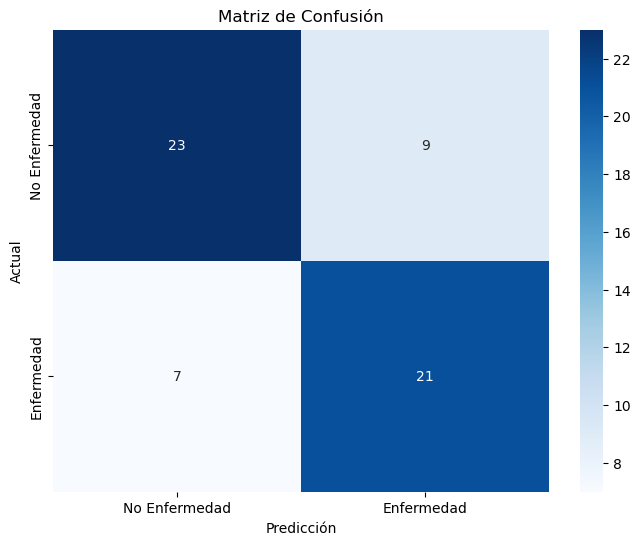

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermedad', 'Enfermedad'], yticklabels=['No Enfermedad', 'Enfermedad'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [13]:
y_probs = model.predict_proba(X_test)[:, 1]  # Solo tomamos la probabilidad de la clase positiva


In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


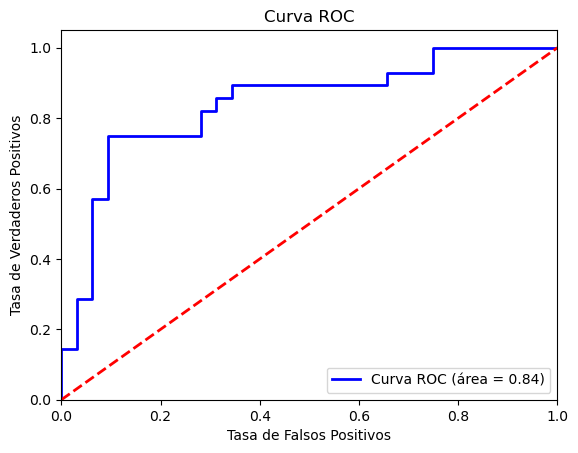

In [15]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [16]:
from sklearn.feature_selection import SelectKBest, chi2


In [17]:
X = df.drop('condition', axis=1)  # Todas las columnas menos la variable objetivo
y = df['condition']  # Variable objetivo


In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las mejores características usando ANOVA
selector = SelectKBest(score_func=f_classif, k='all')  # Puedes cambiar 'all' por un número específico
X_new = selector.fit_transform(X, y)

# Obtener los scores de las características
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Ordenar por score
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)


     Feature       Score
12      thal  109.629171
11        ca   80.577866
9    oldpeak   64.677208
7    thalach   64.589855
8      exang   63.680253
2         cp   59.241915
10     slope   36.804300
1        sex   24.798347
0        age   16.038097
6    restecg    8.394987
3   trestbps    7.117646
4       chol    1.913800
5        fbs    0.002959


In [20]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df.drop('condition', axis=1)  # Asegúrate de reemplazar 'condition' por el nombre correcto de la variable objetivo
y = df['condition']

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (237, 13) (237,)
Test set: (60, 13) (60,)


In [21]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar las primeras predicciones
print("Predicciones:", y_pred[:10])


Predicciones: [1 1 0 0 1 0 1 1 1 0]


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:\n", report)


Matriz de confusión:
 [[23  9]
 [ 7 21]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir el clasificador
model = LogisticRegression(max_iter=300)

# Configurar la búsqueda de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']
}

# Realizar la búsqueda
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Imprimir resultados
from sklearn.metrics import confusion_matrix, classification_report
print("Matriz de confusión:\n", confusion_matrix(y_test, predictions))
print("Reporte de clasificación:\n", classification_report(y_test, predictions))


Mejores hiperparámetros: {'C': 0.1, 'solver': 'saga'}
Matriz de confusión:
 [[24  8]
 [ 6 22]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [27]:
from sklearn.linear_model import LogisticRegression

# Usando los mejores hiperparámetros
best_model = LogisticRegression(C=0.1, solver='saga', max_iter=200)
best_model.fit(X_train, y_train)


LogisticRegression(C=0.1, max_iter=200, solver='saga')

In [28]:
y_pred = best_model.predict(X_test)


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)


Matriz de confusión:
[[24  8]
 [ 6 22]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

